## *CO2 EMISSION PREDICTION MODEL*

#### *On-road emissions data for different types of vehicles are needed for estimating the CO2 emissions and fuel consumption which can affect the car-buying behavior of the citizens with the goal of helping to mitigate the consequences of global warming and achieving sustainable development.* 
*This project was make to predict the CO2 emission index from some kind of vehicle*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

First, import and have a look at the dataset

In [4]:
df = pd.read_csv("FuelConsumption.csv")

In [11]:
df.shape

(1067, 13)

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Are there any missing data in the dataset ?

In [26]:
def missingdata(data):
 total = df.isnull().sum().sort_values(ascending=False)
 percent = total / df.isnull().count().sort_values(ascending=False) * 100
 ms = pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
 return ms

In [27]:
missingdata(df)

,Total,Percent
MODELYEAR,0,0.0
MAKE,0,0.0
MODEL,0,0.0
VEHICLECLASS,0,0.0
ENGINESIZE,0,0.0
CYLINDERS,0,0.0
TRANSMISSION,0,0.0
FUELTYPE,0,0.0
FUELCONSUMPTION_CITY,0,0.0
FUELCONSUMPTION_HWY,0,0.0


In the dataset, feature MODELYEAR, MAKE, MODEL, VEHICLECLASS AND TRANSMISSION are categorical data. These features will be remove from the dataset because they dont affect much on the model and they make the data too complicated

In [85]:
df_train = df.drop(columns=[df.columns[0],df.columns[1],df.columns[2],df.columns[3],df.columns[6]])

Next, create a train and test data for the model training

In [118]:
all_feature = df_train.copy()
target_feature = all_feature.pop("CO2EMISSIONS")

In [32]:
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(all_feature, target_feature, test_size=0.3, random_state=1)

Get dummy feature FUELTYPE

In [120]:
x_train_dum = pd.get_dummies(x_train, columns=[ "FUELTYPE" ],
                        prefix=[ "FUELTYPE"])
x_test_dum = pd.get_dummies(x_test, columns=[ "FUELTYPE"],
                        prefix=["FUELTYPE"])

Then create e linenear model for prediction

In [121]:
model = LinearRegression()

In [122]:
model.fit(x_train_dum, y_train)

LinearRegression()

In [123]:
prediction = model.predict(x_test_dum)

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [126]:
print("Mean absolute error :", mean_absolute_error(y_test,prediction))
print("Mean squared error :", mean_squared_error(y_test,prediction))
print("R score of model :", r2_score(y_test,prediction))

Mean absolute error : 3.3669192951350353
Mean squared error : 32.7012253337034
R score of model : 0.992306279320359


Plot a chart of model's predictions to see how well the model perform 

Text(0.5, 1.0, 'Model prediction')

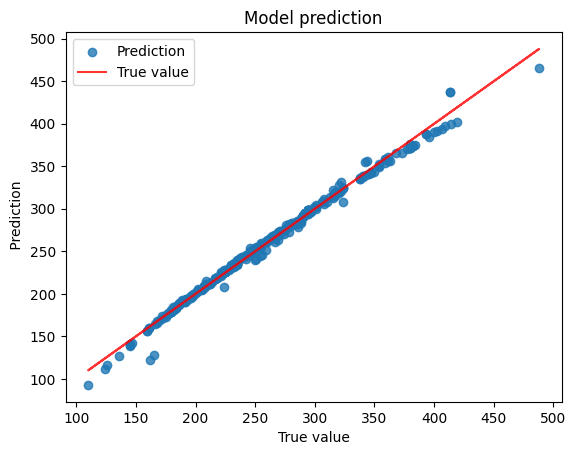

In [131]:
plt.Figure(figsize=(5,5))

plt.scatter(y_test, prediction, alpha= 0.8)
plt.plot(y_test, y_test, color="red", alpha=0.8)

plt.xlabel("True value")
plt.ylabel(" Prediction")

plt.legend(["Prediction","True value"])

plt.title("Model prediction")